In [30]:
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
data = [108,103,352,121,93,53,40,53,22,116,94]
data.sort()
n = len(data)

In [3]:
def mean(data_set):
    return sum(data_set)/len(data_set)

def median(data_set):
    data_set.sort()
    n = len(data_set)
    if n%2==0: # even
        return (data_set[int(n/2)] + data_set[int(n/2-1)])/2
    if n%2==1:
        return data_set[int((n-1)/2)]
    
def mode(data_set):
    modes = []
    maxFreq = max([data_set.count(i) for i in data_set])
    for i in set(data_set):
        if data_set.count(i) == maxFreq:
            modes.append(i)
    return modes

In [4]:
mean_data = (mean(data))
median_data = (median(data))
mode_data = (mode(data))
print("Mean: " + str(mean_data))
print("Median: " + str(median_data))
print("Mode: " + str(mode_data))

Mean: 105.0
Median: 94
Mode: [53]


In [5]:
print("Mean - Mode: " + str(mean_data - mode_data[0]))
print("Mean - Median: " + str(mean_data - median_data))

Mean - Mode: 52.0
Mean - Median: 11.0


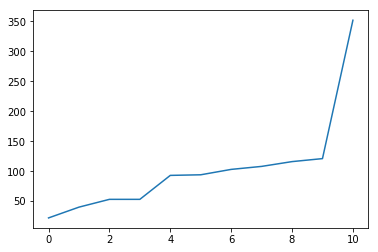

In [6]:
plt.plot(sorted(data))
plt.show()

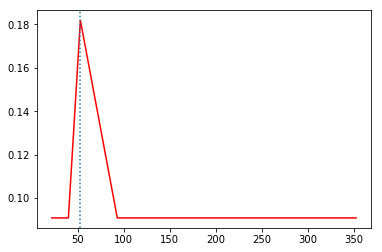

In [7]:
#x value is data
#y value is prob
plt.plot(data, [data.count(i)/len(data) for i in data], "r-")
plt.axvline(x=mode(data),ls="dotted")
plt.show()

$L^2$ - Loss Function:
$$\min_x \sum_{i=1}^n (x_i - x)^2 $$
where $\bar{x}$ is the optimal solution

In [8]:
# L_sq_loss
print(sorted([sum([(i - j)**2 for i in set(data)]) for j in set(data)]))
print(sum([(i-mean_data)**2 for i in set(data)]))

[75260, 75548, 75730, 76378, 77836, 78170, 107930, 124492, 153004, 659884]
75482.0


$L$ - Loss Function:
$$\min_x \sum_{i=1}^n \left| x_i - x\right | $$
where $\tilde{x}$ is the optimal solution

In [9]:
print(sorted([sum([abs(i - j) for i in set(data)]) for j in set(data)]))
print(sum([abs(i-median_data) for i in set(data)]))
print(sorted([sum([abs(i - j) for i in set(data)]) for j in set(data)]))
print(sum([abs(i-median_data ) for i in set(data)]))

[498, 498, 500, 508, 540, 570, 660, 738, 882, 2418]
498
[498, 498, 500, 508, 540, 570, 660, 738, 882, 2418]
498


In [10]:
# NOT A GOOD EXAMPLE
data = [108,103,352,121,93,53,40,53,22,116,94]
data.sort()
print(data)
print("Mean: " + str(mean(data)))
print("Median: " + str(median(data)))
print("Mode: " + str(mode(data)))
n = len(data)
data.remove(min(data))
print(data)
print("Mean: " + str(mean(data)))
print("Median: " + str(median(data)))
print("Mode: " + str(mode(data)))

[22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
Mean: 105.0
Median: 94
Mode: [53]
[40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
Mean: 113.3
Median: 98.5
Mode: [53]


In [11]:
data = [108,103,352,121,93,53,40,53,22,116,94]
print(sp.mean(data))
print(sp.median(data))
print(stats.mode(data))
type(stats.mode(data))

105.0
94.0
ModeResult(mode=array([53]), count=array([2]))


scipy.stats.stats.ModeResult

In [12]:
#trimmed mean
data = [108, 103, 352, 121, 93, 53, 40, 53, 22, 116, 94]
data.sort()
def trimmed_mean(data_set, prop):
    n = len(data_set)
    if prop < 0 or prop > n/2:
        return None
    else:
        return sum([data_set[i] for i in range(prop,n-prop)])/(n-2*prop)
    
print(data)
print(trimmed_mean(data, 1))  # trimm 1 from each side             
print(trimmed_mean(data, 2))  # trimm 2 from each side 
print(trimmed_mean(data, 3))  # trimm 3 from each side  

[22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
86.77777777777777
88.57142857142857
90.2


In [13]:
data = [22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
print(data)
print("Trimming...")

data = data[1:len(data)-1]
print(data)
print(mean(data))

data = data[1:len(data)-1]
print(data)
print(mean(data))

data = data[1:len(data)-1]
print(data)
print(mean(data))

data = data[1:len(data)-1]
print(data)
print(mean(data))

data = data[1:len(data)-1]
print(data)
print(mean(data))

[22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
Trimming...
[40, 53, 53, 93, 94, 103, 108, 116, 121]
86.77777777777777
[53, 53, 93, 94, 103, 108, 116]
88.57142857142857
[53, 93, 94, 103, 108]
90.2
[93, 94, 103]
96.66666666666667
[94]
94.0


<h2>Sample Variance is defined as: </h2>

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

In [14]:
def sample_variance(data_set): #s**2
    n = len(data_set)
    mean_data = sum(data)/n
    return 1/(n-1)*sum([(i-mean_data)**2 for i in data_set])

def sample_stdev(data_set):
    return sample_variance(data_set)**0.5



Range is:  $x_{max} - x_{min}$

Interquartile Range is: $Q_3-Q_1$

Five number summary: {$x_{min}$, $Q_1$, $\tilde{x}$, $Q_3$, $x_{max}$}

FOR BOXPLOT, DATA VALUES MORE THAN 1.5 IQR BELOW $Q_1$ OR ABOVE $Q_3$ IS OUTLIERS

In [21]:
def interquartile(data_set):
    data_set.sort()
    n = len(data_set)
    if n%2==0: # if even
        lower_q = data_set[:int(n/2)]  
        upper_q = data_set[int(n/2):]           
        
    elif n%2 == 1: # if odd
        lower_q = data_set[:int((n-1)/2)]    
        upper_q = data_set[int((n+2)/2):]   
        
    n_sub = len(upper_q)
    if n_sub%2==0:
        q_1 = (lower_q[int(len(n_sub/2))] + lower_q[int(len(n_sub)/2-1)])/2
        q_3 = (upper_q[int(len(n_sub/2))] + upper_q[int(len(n_sub)/2-1)])/2
    else:
        q_1 = lower_q[int((n_sub-1)/2)]  
        q_3 = upper_q[int((n_sub-1)/2)]   
    return {'quartile_1': q_1, 'quartile_3':q_3, 'interquartile_range':(q_3-q_1)}
    
new_data = [3, 5, 7, 8, 9, 11, 15, 16, 20, 21]
print(interquartile(new_data))

def five_number_summary(data_set):
    result = interquartile(data_set)
    result['x_min'] = min(data_set)
    result['x_max'] = max(data_set)
    return result

print(five_number_summary(new_data))

{'quartile_1': 7, 'quartile_3': 16, 'interquartile_range': 9}
{'quartile_1': 7, 'quartile_3': 16, 'interquartile_range': 9, 'x_min': 3, 'x_max': 21}


In [32]:
pd.Series(data).describe()

count     11.000000
mean     105.000000
std       88.422848
min       22.000000
25%       53.000000
50%       94.000000
75%      112.000000
max      352.000000
dtype: float64

In [44]:
def interquartile(data_set):
    data_set.sort()
    n = len(data_set)
    if n%2==0: # if even
        lower_q = data_set[:int(n/2)]  
        upper_q = data_set[int(n/2):]           
        
    elif n%2 == 1: # if odd
        lower_q = data_set[:int((n+1)/2)]    #initially was (n-1)
        upper_q = data_set[int((n-1)/2):]   
        
    n_sub = len(upper_q)
    if n_sub%2==0:
        q_1 = (lower_q[int(n_sub/2)] + lower_q[int(n_sub/2-1)])/2
        q_3 = (upper_q[int(n_sub/2)] + upper_q[int(n_sub/2-1)])/2
    else:
        q_1 = lower_q[int((n_sub-1)/2)]  
        q_3 = upper_q[int((n_sub-1)/2)]   
    return {'quartile_1': q_1, 'quartile_3':q_3, 'interquartile_range':(q_3-q_1)}

def five_number_summary(data_set):
    result = interquartile(data_set)
    result['x_min'] = min(data_set)
    result['x_max'] = max(data_set)
    return result

Boxplot takes 1.5IQR as a default

[22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
{'quartile_1': 53.0, 'quartile_3': 112.0, 'interquartile_range': 59.0, 'x_min': 22, 'x_max': 352}


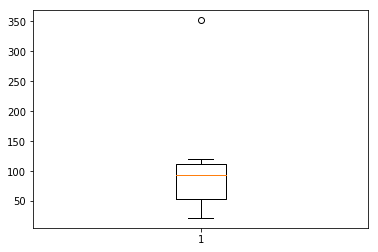

In [66]:
new_data = [22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
summary = five_number_summary(new_data)
print(new_data)
print(summary)
plt.boxplot(new_data, whis=1.5)
plt.show()

By removing the outliers (using the 1.5IQR rule) and including all, we can see it is the same as the previous boxplot

[93, 94, 103, 108, 116, 121]
{'quartile_1': 94, 'quartile_3': 116, 'interquartile_range': 22, 'x_min': 93, 'x_max': 121}


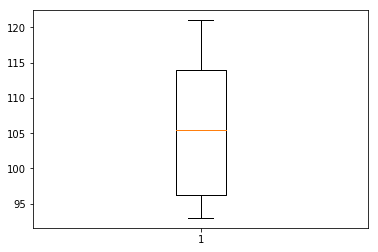

In [65]:
new_data = [22, 40, 53, 53, 93, 94, 103, 108, 116, 121, 352]
new_data = [i for i in new_data if i>=1.5*summary['quartile_1'] and i<=1.5*summary['quartile_3']]
print(new_data)
print(five_number_summary(new_data))
plt.boxplot(new_data, whis=100)
plt.show()